In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dotenv import load_dotenv
import os
from bokeh.io import show
from bokeh.plotting import gmap
from bokeh.models import GMapOptions, ColumnDataSource, HoverTool, ColorBar
from bokeh.transform import linear_cmap
from bokeh.palettes import Viridis256 as palette

In [51]:
accidentsDf = pd.read_csv("datasets/barcelona/accidents_2017.csv")
accidentsDf.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360886
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


In [52]:
weekdaysData = accidentsDf.Weekday.value_counts()

weekdaysDf = {"Accidents" : weekdaysData}
weekdaysDf = pd.DataFrame(weekdaysDf)

sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorterIndex = dict(zip(sorter, range(len(sorter))))

weekdaysDf['Day_id'] = weekdaysDf.index
weekdaysDf['Day_id'] = weekdaysDf['Day_id'].map(sorterIndex)
weekdaysDf.sort_values('Day_id', inplace=True)

weekdaysDf = weekdaysDf.drop("Day_id", axis=1)

weekdaysDf

,Accidents
Monday,1510
Tuesday,1691
Wednesday,1650
Thursday,1677
Friday,1761
Saturday,1155
Sunday,895


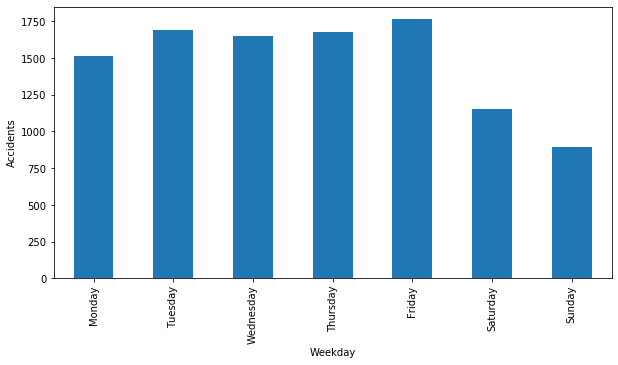

In [64]:
ax = weekdaysDf.plot(kind='bar', figsize=(10, 5), legend=False)
ax.set_ylabel('Accidents')
ax.set_xlabel('Weekday')
plt.savefig("plots/weekdays_accidents")

In [54]:
vehicles = accidentsDf["Vehicles involved"].value_counts()
vehicles = vehicles.sort_index()
vehicles

0        5
1     2260
2     7031
3      798
4      165
5       48
6       14
7        6
8        2
9        5
10       2
11       1
13       1
14       1
Name: Vehicles involved, dtype: int64

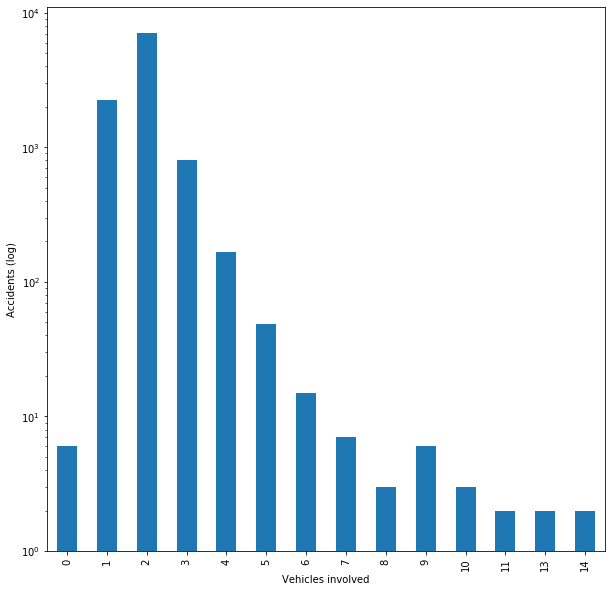

In [55]:
ax = vehicles.plot(kind='bar', figsize=(10, 10), log=True)
ax.set_xlabel('Vehicles involved')
ax.set_ylabel('Accidents (log)')
plt.savefig("plots/vehicles_involved_log")

In [56]:
district = accidentsDf["District Name"].value_counts()
district = district.drop("Unknown", axis=0)
district

Eixample               3029
Sant Martí             1336
Sants-Montjuïc         1104
Sarrià-Sant Gervasi    1104
Horta-Guinardó          743
Les Corts               726
Ciutat Vella            600
Sant Andreu             597
Nou Barris              542
Gràcia                  531
Name: District Name, dtype: int64

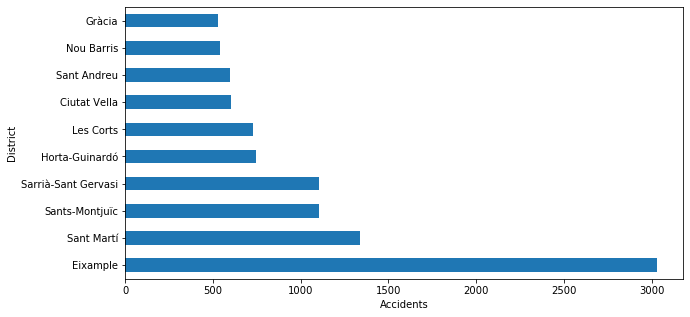

In [57]:
ax = district.plot(kind='barh', figsize=(10, 5))
ax.set_xlabel('Accidents')
ax.set_ylabel('District')
plt.savefig("plots/district")

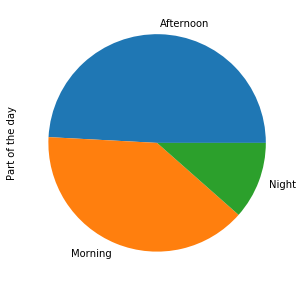

In [58]:
ax = accidentsDf["Part of the day"].value_counts().plot(kind="pie", figsize=(10, 5))
plt.savefig("plots/part_of_the_day")

In [59]:
airQualityDf = pd.read_csv("datasets/barcelona/air_quality_Nov2017.csv")
airQualityDf.head()

,Station,Air Quality,Longitude,Latitude,O3 Hour,O3 Quality,O3 Value,NO2 Hour,NO2 Quality,NO2 Value,PM10 Hour,PM10 Quality,PM10 Value,Generated,Date Time
0,Barcelona - Sants,Good,2.1331,41.3788,NaN,NaN,NaN,0h,Good,84.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
1,Barcelona - Eixample,Moderate,2.1538,41.3853,0h,Good,1.0,0h,Moderate,113.0,0h,Good,36.0,01/11/2018 0:00,1541027104
2,Barcelona - Gràcia,Good,2.1534,41.3987,0h,Good,10.0,0h,Good,73.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
3,Barcelona - Ciutadella,Good,2.1874,41.3864,0h,Good,2.0,0h,Good,86.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
4,Barcelona - Vall Hebron,Good,2.1480,41.4261,0h,Good,7.0,0h,Good,69.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104


In [60]:
df1 = airQualityDf[['Station', 'Generated', 'O3 Value', 'NO2 Value', 'PM10 Value']].dropna()
eixampleDf = df1[df1['Station'].str.contains('Eixample')]
eixampleDf = eixampleDf[eixampleDf["Generated"].str.contains('01/11/2018')]
eixampleDf = eixampleDf.set_index('Generated')
eixampleDf

,Station,O3 Value,NO2 Value,PM10 Value
Generated,,,,
01/11/2018 0:00,Barcelona - Eixample,1.0,113.0,36.0
01/11/2018 1:00,Barcelona - Eixample,6.0,80.0,35.0
01/11/2018 2:00,Barcelona - Eixample,14.0,64.0,34.0
01/11/2018 3:00,Barcelona - Eixample,32.0,44.0,35.0
01/11/2018 4:00,Barcelona - Eixample,43.0,34.0,34.0
01/11/2018 5:00,Barcelona - Eixample,45.0,26.0,33.0
01/11/2018 6:00,Barcelona - Eixample,37.0,31.0,27.0
01/11/2018 7:00,Barcelona - Eixample,24.0,37.0,25.0
01/11/2018 8:00,Barcelona - Eixample,18.0,42.0,24.0


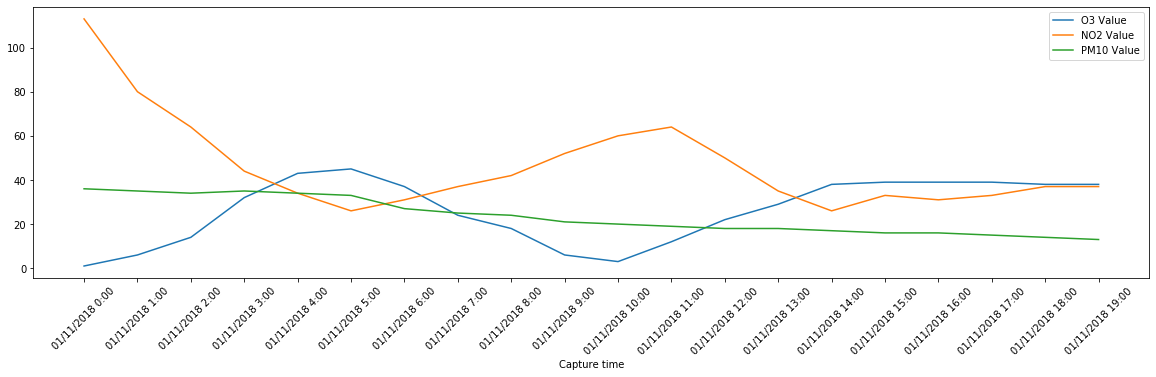

In [61]:
ax = eixampleDf.plot(figsize=(20, 5))
ax.set_xticks(np.arange(len(eixampleDf.index)))
ax.set_xticklabels(eixampleDf.index)
ax.set_xlabel("Capture time")
plt.xticks(rotation=45)
plt.savefig("plots/air_quality_eixample")

In [62]:
load_dotenv()
api_key = os.environ.get("gcp_maps_key")
accidentsDf.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360886
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


In [74]:
gmap_options = GMapOptions(lat=41.403441, lng=2.174737, 
                            map_type='roadmap', zoom=12)
hover = HoverTool(
    tooltips = [
        ('Day', '@Day'),
        ('Month', '@Month'), 
        ('Street', '@Street'), 
        ('Vehicles', '@{Vehicles involved}'), 
        ('Part of the day', '@{Part of the day}'), 
        ('Mild injuries', '@{Mild injuries}'), 
        ('Serious injuries', '@{Serious injuries}'), 
        ('Victims', '@Victims'), 
    ]
)

p = gmap(api_key, gmap_options, title='Barcelona accidents', 
            width=750, height=700, 
            tools=[hover, 'reset', 'wheel_zoom', 'pan'])

source = ColumnDataSource(accidentsDf)
mapper = linear_cmap('Vehicles involved', palette, 0., 14.)  
center = p.circle('Longitude', 'Latitude', size=4, alpha=0.2, color=mapper, source=source)
color_bar = ColorBar(color_mapper=mapper['transform'], location=(0,0), title="Vehicles involved")
p.add_layout(color_bar, 'right')

show(p)